# Comparing Ionization Fractions
Compare the computed ion fractions for a few heating cases. Our resulting intensities don't seem to show much difference between the two.

In [96]:
import json
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import synthesizAR
from synthesizAR.atomic import EmissionModel

%matplotlib inline

## Cooling

In [58]:
field_cooling = synthesizAR.Field.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/cooling/field_checkpoint/')

In [59]:
em_model_cooling_nei = EmissionModel.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/cooling/nei/emission_model.json')

In [60]:
em_model_cooling_ieq = EmissionModel.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/cooling/ieq/emission_model_dominant.json')

In [61]:
for i,ion in enumerate(em_model_cooling_nei._ion_list):
    if ion.element_name == 'iron':
        print(i, ion.ion_name)

21 Fe 1
22 Fe 2
23 Fe 3
24 Fe 4
25 Fe 5
26 Fe 6
27 Fe 7
28 Fe 8
29 Fe 9
30 Fe 10
31 Fe 11
32 Fe 12
33 Fe 13
34 Fe 14
35 Fe 15
36 Fe 16
37 Fe 17
38 Fe 18
39 Fe 19
40 Fe 20
41 Fe 21
42 Fe 22
43 Fe 23
44 Fe 24
45 Fe 25
46 Fe 26
47 Fe 27


In [190]:
loop = field_cooling.loops[2000]

In [191]:
y_cooling_nei = em_model_cooling_nei.get_ionization_fraction(loop, em_model_cooling_nei[32])

In [192]:
y_cooling_ieq = em_model_cooling_ieq.get_ionization_fraction(loop, em_model_cooling_ieq[32])

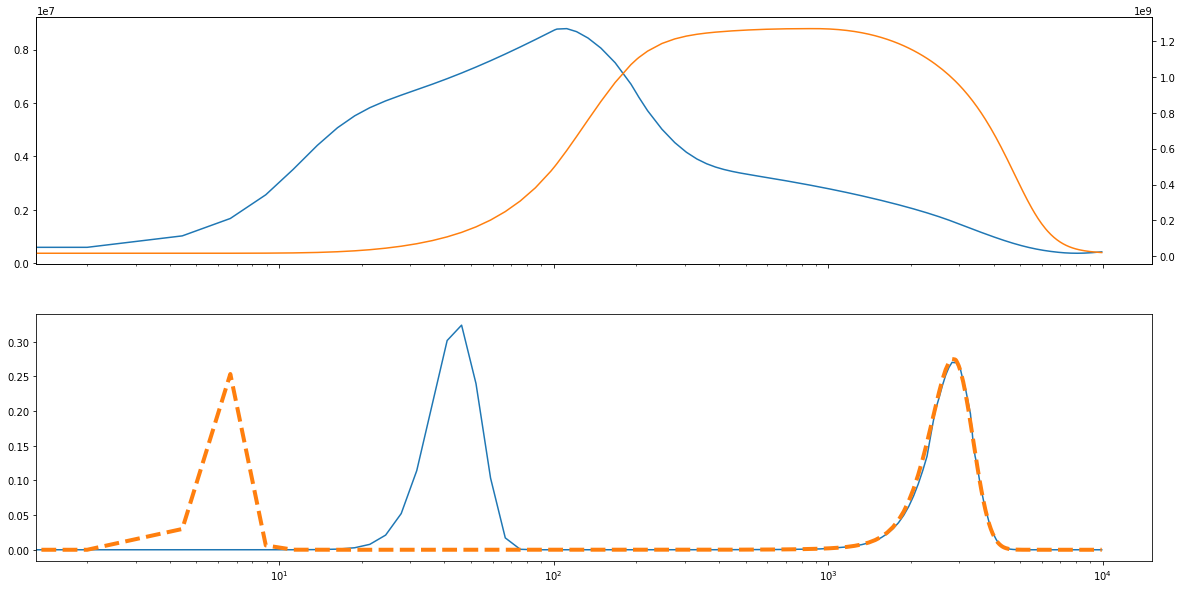

In [193]:
fig,axes = plt.subplots(2,1,figsize=(20,10),sharex=True)
axes[0].plot(loop.time, loop.electron_temperature[:,0],color='C0')
axes[0].twinx().plot(loop.time, loop.density[:,0],color='C1')
axes[1].plot(loop.time, y_cooling_nei[:,0], label='NEI')
axes[1].plot(loop.time, y_cooling_ieq[:,0], label='IEQ', ls='--', lw=4)
axes[1].set_xscale('log')

## Low Frequency

In [67]:
field_low = synthesizAR.Field.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/field_checkpoint/')

In [68]:
em_model_low_nei = EmissionModel.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/emission_model.json')

In [69]:
em_model_low_ieq = EmissionModel.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/ieq/emission_model.json')

In [83]:
loop = field_low.loops[100]
y_low_nei = em_model_low_nei.get_ionization_fraction(loop, em_model_low_nei[38])
y_low_ieq = em_model_low_ieq.get_ionization_fraction(loop, em_model_low_ieq[38])

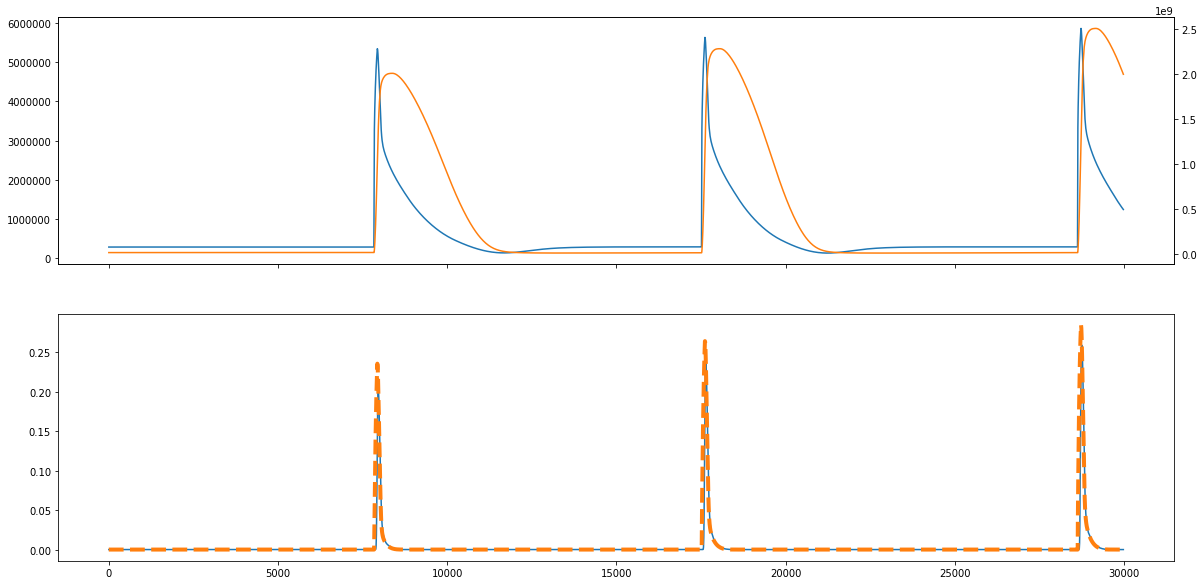

In [86]:
fig,axes = plt.subplots(2,1,figsize=(20,10),sharex=True)
axes[0].plot(loop.time, loop.electron_temperature[:,0],color='C0')
axes[0].twinx().plot(loop.time, loop.density[:,0],color='C1')
axes[1].plot(loop.time, y_low_nei[:,0], label='NEI')
axes[1].plot(loop.time, y_low_ieq[:,0], label='IEQ', ls='--', lw=4)
#axes[1].set_xscale('log')
#axes[1].set_xlim(6e3,9e3)

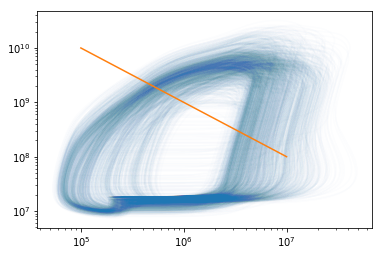

In [189]:
const_temperature=np.logspace(5,7,100)
const_density = 1e15 / const_temperature
for loop in field_low.loops[::10]:
    plt.plot(loop.electron_temperature[:,0].value, loop.density[:,0].value, alpha=0.01,color='C0')
plt.plot(const_temperature, const_density,color='C1')
plt.xscale('log')
plt.yscale('log')

## Intermediate Frequency

In [93]:
field_intermediate = synthesizAR.Field.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/field_checkpoint/')

In [94]:
em_model_intermediate_nei = EmissionModel.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/emission_model.json')

In [110]:
em_model_intermediate_ieq = EmissionModel.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/ieq/emission_model.json')

In [163]:
loop = field_intermediate.loops[100]
ion_ieq = em_model_intermediate_ieq[58]
ion_nei = em_model_intermediate_nei[58]
y_intermediate_nei = em_model_intermediate_nei.get_ionization_fraction(loop, ion_nei)
y_intermediate_ieq = em_model_intermediate_ieq.get_ionization_fraction(loop, ion_ieq)
print(ion_ieq.ion_name)

Mg 11


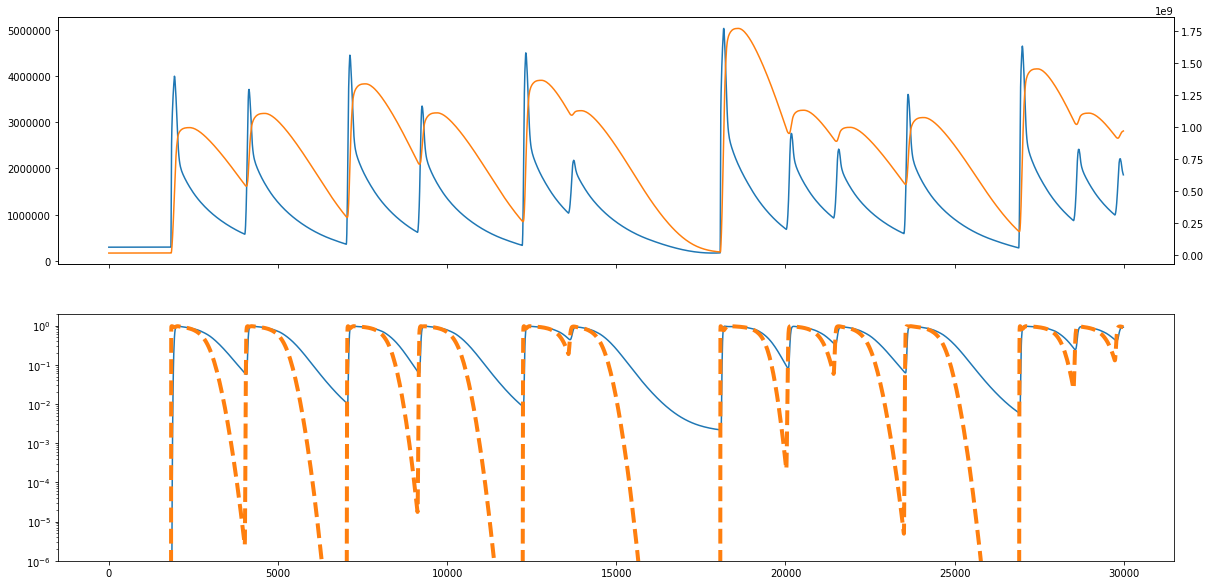

In [170]:
fig,axes = plt.subplots(2,1,figsize=(20,10),sharex=True)
axes[0].plot(loop.time, loop.electron_temperature[:,0],color='C0')
axes[0].twinx().plot(loop.time, loop.density[:,0],color='C1')
axes[1].plot(loop.time, y_intermediate_nei[:,0], label='NEI')
axes[1].plot(loop.time, y_intermediate_ieq[:,0], label='IEQ', ls='--', lw=4)
#axes[1].set_xscale('log')
#axes[1].set_xlim(0,7e3)
axes[1].set_ylim(1e-6,2)
axes[1].set_yscale('log')

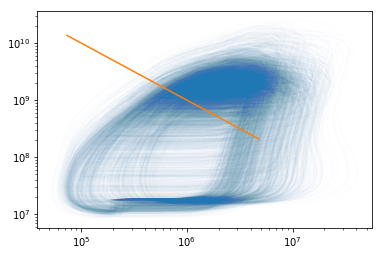

In [188]:
const_temperature=np.linspace(loop.electron_temperature.min().value,loop.electron_temperature.max().value,100)
const_density = 1e15 / const_temperature
for loop in field_intermediate.loops[::10]:
    plt.plot(loop.electron_temperature[:,0].value, loop.density[:,0].value, alpha=0.01,color='C0')
plt.plot(const_temperature, const_density,color='C1')
plt.xscale('log')
plt.yscale('log')

## High Frequency

In [172]:
field_high = synthesizAR.Field.restore(
    '/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/field_checkpoint/')

In [173]:
loop = field_high.loops[100]

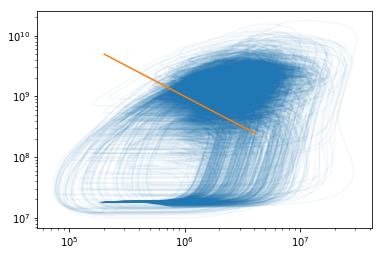

In [186]:
const_temperature=np.logspace(5,7,100)
const_density = 1e15 / const_temperature
for loop in field_high.loops[::10]:
    plt.plot(loop.electron_temperature[:,0].value, loop.density[:,0].value, alpha=0.05,color='C0')
plt.plot(const_temperature, const_density,color='C1')
plt.xscale('log')
plt.yscale('log')